# Misura dell'Efficienza del Rivelatore 3

### Updated to 13 December 2024 - Andre

Dimensioni rivelatori: ...


Questo notebook contiene la misura dell'efficienza dei tre scintillatori calcolata sfruttando le coincidenze doppie e triple mediante la formula:

$\epsilon_{riv} = \frac{N_{triple}}{N_{doppie}}$
> * I conteggi vengono effettuati ogni 5 minuti.
> * WDT del'onda quadra generata dal discriminatore a 169 per avere $\Delta t$ = 50 ns 
> * Tempo morto [dead time] = 150 ns (impostato a 0)
> * Delay time = 5 ns (per tutti e tre i rivelatori)
> * N.B.: Non si è tenuto conto delle coincidenze accidentali (il conteggio è stato fatto ed è un numero trascurabile rispetto al numero di conteggi singoli)
> * N.B.: Per trovare il valore ottimale di Threshold, aspettiamo di scendere sotto al 90% di efficienza e ci fermiamo (con quel voltaggio)

### Esempio: Efficienza del Secondo Rivelatore

Sfruttiamo le coincidenze triple. Le coincidenze doppie sono relative al primo e al terzo rivelatore: 

$N_{triple} = N_{\mu} \, \epsilon_1 \, \epsilon_2 \, \epsilon_3$,

$N_{doppie} = N_{\mu}\, \epsilon_1 \,\epsilon_2$ $=$ $N_{1,2} $ 
$\Rightarrow$ $\epsilon_3 = \frac{N_{triple}}{N_{1,2}} $

Per l'efficienza del secondo rivelatore, ci mettiamo in un intorno di V = 1050 V (valore che avevamo qualitativamente verificato essere ottimale), testando V = 1000, 1050, 1100 V a diverse threshold. 
Ci aspettiamo che V = 1050 V e Th = 70 mV siano i parametri ottimali.

In [127]:
#LIBRERIE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import uproot

#PARAMTERI
DELTA_T = 50 * 10 ** (-9) #s
MIN_TEST = 5 #min
SECONDI_TEST = MIN_TEST * 60 #s

#COSTANTI
FIGSIZE_1_1 = (10, 6)
FIGSIZE_3_1 = (10, 18)
FIGSIZE_3_2 = (18, 12)

FONT = "DejaVu Sans"
FONT_DIM = [12,15,18,21,27]
MARKER_SIZE = 4
LINE_WIDTH = 1.5
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.8


COLORI_BIN = ["tab:blue", "tab:red"]
COLORI_DUE = ["tab:blue", "tab:orange"]
COLORI_TRE = ["tab:blue", "tab:green", "tab:red"]
COLORI_ARC = ["tab:purple", "tab:blue", "tab:green", "tab:olive", "tab:orange", "tab:red"]
COLORI_ARC_10 = ["maroon", "tab:red","darkorange" ,"darkgoldenrod", "tab:olive", "tab:green", "teal", "tab:blue", "tab:purple", "darkmagenta"]


CARTELLA_IMMAGINI = "Immagini/"
ESPORTA_IMMGAGINI = True
FORMATO_IMMAGINI = ".pdf"
DPI = 300

#FONT (LaTeX)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

### Raccolta Dati

* Voltaggio dello scintillatore 1:  $V_1 = 1150 \,V$
* Threshold dello scintillatore 1:  $Th_1 = 60 \,mV$

* Voltaggio dello scintillatore 3:  $V_2 = 1050 \,V$
* Threshold dello scintillatore 3:  $Th_2 = 90 \,mV$


Variamo il voltaggio e la threshold per trovare il punto in cui l'efficienza dello Scintillatore 3 è massima.

In [ ]:
# Rivelatore 3 : le doppie sono 1,2
data_1000V = {
'V [V]': np.full(13, 1000),
'Th [mV]' :     [0, 10, 20, 30, 40, 50, 60, 70, 80, 
                90, 100, 120, 150, ],
'N_singole_1': [31107, 30904, 31132, 31380, 31316, 31202, 31232, 31188, 31248, 
                31300, 30524, 31195, 30982, ],
'N_singole_2': [9484, 9616, 9646, 9642, 9658, 9601, 9417, 9382, 9620, 
                9538, 9342, 9394, 9457, ],
'N_singole_3': [1256514, 157200, 63839, 27871, 16449, 11562, 10065, 9273, 8920, 
                8312, 7508, 5691, 3083, ],  
'N_doppie_12' : [5587, 5722, 5713, 5678, 5731, 5676, 5590, 5546, 5687, 
                5604, 5466, 5590, 5656, ],
'N_doppie_13' : [10613, 7962, 7511, 7339, 7364, 7132, 7085, 6903, 6916, 
                6626, 6091, 4635, 2464, ],
'N_doppie_23' : [7139, 7013, 6961, 6878, 6913, 6735, 6585, 6468, 6563, 
                6330, 5839, 4463, 2391, ],   
'N_triple' :    [5555, 5696, 5687, 5646, 5709, 5650, 5567, 5500, 5608, 
                5438, 5016, 3808, 1980, ],
}

# Rivelatore 3 : le doppie sono 1,2
data_1050V = {
'V [V]': np.full(17, 1050),
'Th [mV]' :     [0, 10, 20, 30, 40, 50, 60, 70, 80,
                90, 100, 110, 120, 130, 150, 170, 200, ],
'N_singole_1': [30774, 30615, 31029, 29939, 29550, 29786, 28928, 29685, 29340, 
                29483, 29549, 29145, 28143, 29602, 29260, 30466, 29629, ],
'N_singole_2': [9359, 9444, 9550, 9437, 9580, 9566, 9484, 9249, 9609, 
                9501, 9544, 9493, 9446, 9386, 9431, 9434, 9347, ],
'N_singole_3': [1576527, 253650, 127591, 68535, 38553, 23541, 16375, 12359, 11117, 
                10010, 9385, 9074, 8759, 8310, 7230, 5945, 3649, ],
'N_doppie_12' : [5576, 5607, 5716, 5565, 5646, 5607, 5409, 5502, 5641, 
                5513, 5464, 5547, 5376, 5505, 5497, 5604, 5534,],
'N_doppie_13' : [10673, 8352, 7770, 7433, 7395, 7206, 7015, 6989, 7141, 
                6940, 6810, 6770, 6507, 6480, 5812, 4859, 2885, ],
'N_doppie_23' : [7128, 6902, 6942, 6879, 6989, 6833, 6720, 6533, 6874, 
                6655, 6557, 6609, 6501, 6323, 5679, 4654, 2794,],
'N_triple' :    [5552, 5589, 5701, 5539, 5615, 5581, 5388, 5482, 5611, 
                5481, 5417, 5461, 5278, 5290, 4801, 4007, 2337,],
}

# Rivelatore 3 : le doppie sono 1,2
data_1100V = {
'V [V]': np.full(20, 1100),
'Th [mV]' :     [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                110, 120, 130, 140, 150, 160, 170,  
                200, 230, ],
'N_singole_1': [30274, 30325, 30369, 30190, 29526, 24768, 26826, 27061, 27089, 25664, 26559, 
                27430, 27311, 27041, 26780, 24370, 22860, 24043,  
                26533, 25411, ],
'N_singole_2': [9593, 9422, 9414, 9411, 9536, 9363, 9413, 9384, 9428, 9455, 9343, 
                9275, 9337, 9453, 9390, 9336, 9366, 9387, 
                9322, 9463, ],
'N_singole_3': [1741470, 376893, 207591, 129987, 85815, 55761, 36862, 25540, 19295, 15209, 12616, 
                11140, 10224, 9772, 9475, 9064, 8873, 8543, 
                7594, 5928, ],
'N_doppie_12' : [5686, 5670, 5619, 5570, 5598,  4924, 5208, 5307, 5374, 5043, 5141, 
                5152, 5250, 5326, 5299, 5001, 4992, 4975, 
                5225, 5297, ],
'N_doppie_13' : [10840, 8873, 8138, 7731, 7478, 6493, 6874, 6900, 6904, 6479, 6592, 
                6589, 6648, 6670, 6627, 6208, 6117, 6129, 
                5845, 4591, ],
'N_doppie_23' : [7294, 7035, 6912, 6860, 6889, 6624, 6715, 6698, 6806, 6683, 6574, 
                6500, 6566, 6599, 6594, 6489, 6438, 6295, 
                5825, 4626,],  
'N_triple' :    [5626, 5640, 5589, 5545, 5566, 4882, 5173, 5268, 5342, 5011, 5101, 
                5117, 5210, 5284, 5245, 4937, 4909, 4867,
                4747, 3729,],
}

df_1000V = pd.DataFrame(data_1000V)
df_1050V = pd.DataFrame(data_1050V)
df_1100V = pd.DataFrame(data_1100V)

df_1000V = df_1000V.sort_values(by='Th [mV]')
df_1050V = df_1050V.sort_values(by='Th [mV]')
df_1100V = df_1100V.sort_values(by='Th [mV]')

Asse_x = {
    1000: np.array([0, 20, 40, 60, 80, 100, 120, 140, 160]),
    1050: np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]),
    1100: np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]),
}

dataframes =    [df_1000V,  df_1050V,   df_1100V]
voltages =      [1000,      1050,       1100    ]

In [ ]:
for df in dataframes:
    # Calculate double coincidences
    N_doppie_acc_12 = (df['N_singole_1'] / SECONDI_TEST) * (df['N_singole_2'] / SECONDI_TEST) * DELTA_T
    N_doppie_acc_13 = (df['N_singole_1'] / SECONDI_TEST) * (df['N_singole_3'] / SECONDI_TEST) * DELTA_T
    N_doppie_acc_23 = (df['N_singole_2'] / SECONDI_TEST) * (df['N_singole_3'] / SECONDI_TEST) * DELTA_T

    # Calculate triple coincidences
    N_triple_acc = (
                    (df['N_singole_1'] / SECONDI_TEST) *
                    (df['N_singole_2'] / SECONDI_TEST) *
                    (df['N_singole_3'] / SECONDI_TEST) *
                    DELTA_T ** 2
    )

    # Calculate errors
    epsilon_3 = df['N_triple'] / df['N_doppie_13']
    sigma_epsilon_3 = np.sqrt(epsilon_3 / df['N_doppie_13'] * (1 - epsilon_3))

    df['N_doppie_acc_12'] = N_doppie_acc_12
    df['N_doppie_acc_13'] = N_doppie_acc_13
    df['N_doppie_acc_23'] = N_doppie_acc_23
    df['N_triple_acc'] = N_triple_acc
    df['epsilon_3'] = epsilon_3
    df['sigma_epsilon_3'] = sigma_epsilon_3

#ATTENZIONE QUESTO VA PER ULTIMO PERCHE SOPRA DIVIDO PER MIN_TEST * 60
for df in dataframes:
    df['N_singole_1'] = df['N_singole_1'] / MIN_TEST
    df['N_singole_2'] = df['N_singole_2'] / MIN_TEST
    df['N_singole_3'] = df['N_singole_3'] / MIN_TEST

df_1000V     

,V [V],Th [mV],N_singole_1,N_singole_2,N_singole_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,N_doppie_acc_12,N_doppie_acc_13,N_doppie_acc_23,N_triple_acc,epsilon_2,sigma_epsilon_2
0,1000,0,12861.8,176293.8,2600.4,14892,6016,7830,5998,0.031492,0.000465,0.006367,6.824411e-08,0.997008,0.000704
3,1000,10,6217.0,26689.4,2552.8,7874,5831,7137,5819,0.002305,0.000220,0.000946,4.902558e-09,0.997942,0.000593
4,1000,20,6204.0,9987.0,2506.4,7537,5821,7046,5798,0.000861,0.000216,0.000348,1.797395e-09,0.996049,0.000822
5,1000,30,6338.8,4583.0,2550.6,7626,6068,7155,6044,0.000403,0.000225,0.000162,8.576015e-10,0.996045,0.000806
6,1000,40,6199.8,2759.2,2482.2,7174,5765,6776,5745,0.000238,0.000214,0.000095,4.914551e-10,0.996531,0.000774
1,1000,50,11994.0,2170.4,2567.4,7191,5885,6834,5856,0.000362,0.000428,0.000077,7.735415e-10,0.995072,0.000913
7,1000,60,6173.4,1941.6,2548.6,7061,5894,6872,5842,0.000166,0.000219,0.000069,3.535673e-10,0.991177,0.001218
8,1000,70,6102.0,1816.0,2502.4,6971,5911,6694,5796,0.000154,0.000212,0.000063,3.209453e-10,0.980545,0.001796
9,1000,80,6134.6,1684.6,2514.6,6569,5796,6418,5547,0.000144,0.000214,0.000059,3.007726e-10,0.957039,0.002663
10,1000,90,6050.4,1534.4,2511.0,6208,5726,5921,5149,0.000129,0.000211,0.000054,2.698085e-10,0.899232,0.003978


In [ ]:
# Per rendere il confronto tra efficienze più facili, creo un dataframe le cui colonne saranno solo 
# i valori delle efficienze :
epsilon_data = {}  # Dictionary to store epsilon_1 values for comparison

for i, df in enumerate(dataframes, start=1):  # Loop through DataFrames
    epsilon_data[f'df_{i}'] = df['epsilon_3']

# Create a new DataFrame for epsilon_1 values
epsilon_df = pd.DataFrame(epsilon_data)

In [131]:
epsilon_df

# N.B. : Se alcuni valori sono NaN è solo perché non abbiamo preso quei dati
# inoltre questo confronto è poco fair perché efficienze della stessa riga NON
# corrispondono necessariamente a threshold uguali
# è giusto un confronto visivo tra voltaggi (e NON threshold)

,df_1,df_2,df_3
0,0.997008,0.997771,0.996078
1,0.995072,0.996565,0.996940
2,0.795915,0.996895,0.996887
3,0.997942,0.995838,0.996118
4,0.996049,0.995015,0.997235
5,0.996045,0.996331,0.995466
6,0.996531,0.995935,0.996438
7,0.991177,0.995627,0.996324
8,0.980545,0.993235,0.995617
9,0.957039,0.989885,0.995672


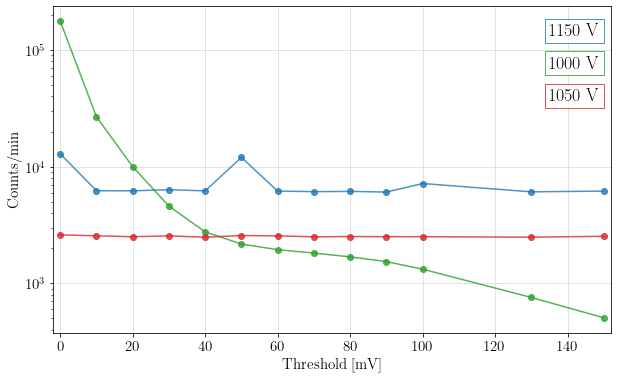

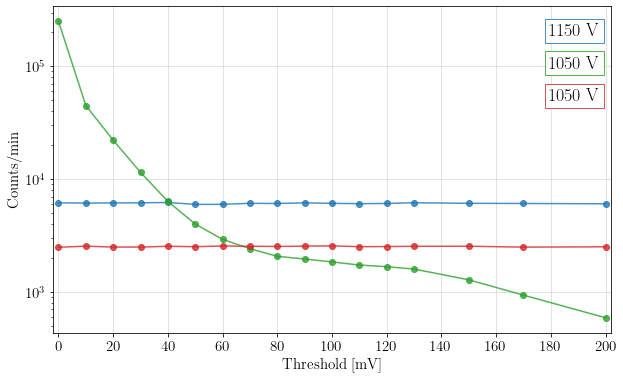

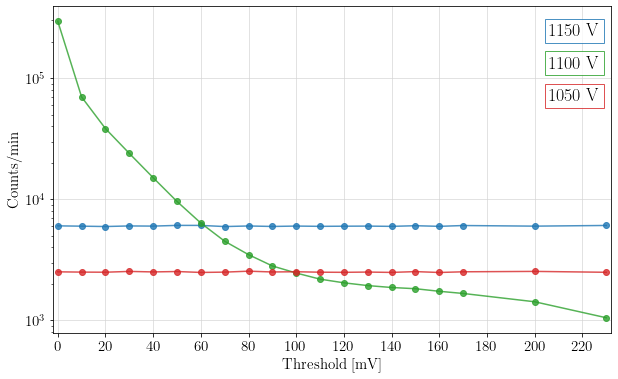

In [ ]:
for df, voltage in zip(dataframes, voltages):
    plt.figure(figsize = FIGSIZE_1_1)

    plt.plot(df['Th [mV]'], df['N_singole_1'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[0], alpha = GRID_ALPHA)
    plt.plot(df['Th [mV]'], df['N_singole_2'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[1], alpha = GRID_ALPHA)
    plt.plot(df['Th [mV]'], df['N_singole_3'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[2], alpha = GRID_ALPHA)

    #plt.title('Counts per Minute vs Threshold Voltage', fontsize = FONT_DIM[1])
    plt.xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
    plt.ylabel('Counts/min', fontsize = FONT_DIM[1])

    plt.xticks(Asse_x[voltage], fontsize = FONT_DIM[1])
    plt.yticks(fontsize = FONT_DIM[1])

    plt.xlim(-2, df['Th [mV]'].max() + 2)
    
    plt.yscale('log')
    plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)
    
    ax = plt.gca()  # Ottieni l'oggetto Axes corrente
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            '1150 V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[0]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.85,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[1]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.75,  # Coordinate relative (x, y)
            '1050 V',  
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[2]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto

    #plt.tight_layout()

    if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_3_plateau_" + f'{voltage}' + "_V" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

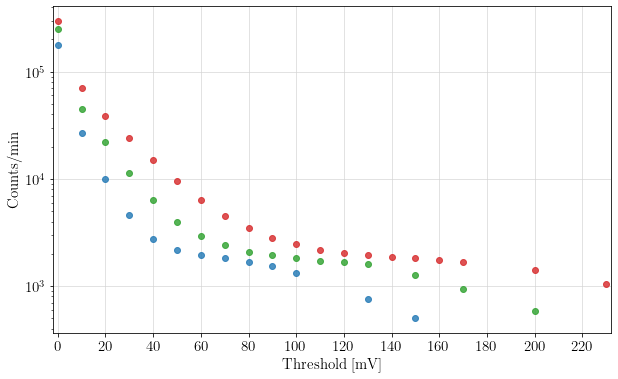

In [ ]:
# Create a single figure for the three curves
plt.figure(figsize = FIGSIZE_1_1)

for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    plt.plot(df['Th [mV]'], df['N_singole_3'], linestyle = '', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[iPlot], alpha = GRID_ALPHA)

# Add titles and labels
#plt.title('Counts per Minute vs Threshold Voltage', fontsize = FONT_DIM[1])
plt.xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
plt.ylabel('Counts/min', fontsize = FONT_DIM[1])

plt.xticks(Asse_x[1100], fontsize = FONT_DIM[1])
plt.yticks(fontsize = FONT_DIM[1])

plt.xlim(-2, df['Th [mV]'].max() + 2)

plt.yscale('log')
plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)

if ESPORTA_IMMGAGINI:
    plt.savefig(CARTELLA_IMMAGINI + "2_3_plateau_completo" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()


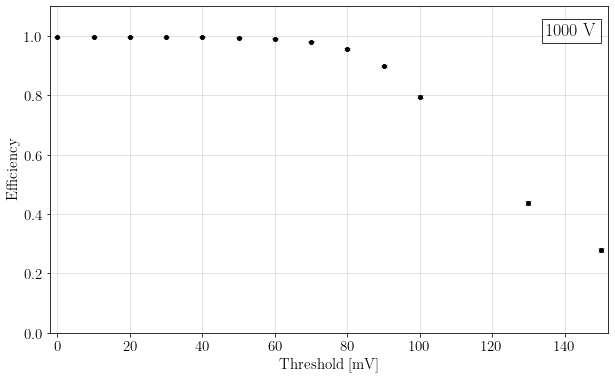

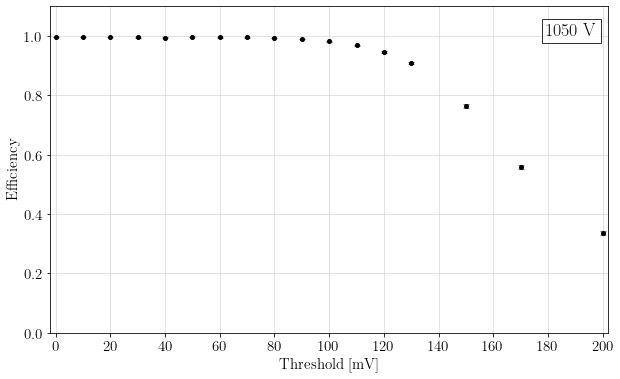

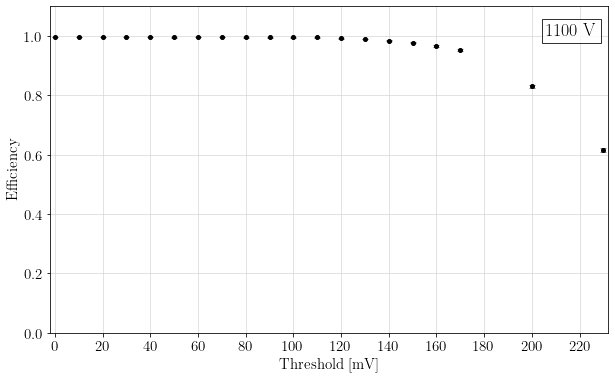

In [ ]:
for df, voltage in zip(dataframes, voltages):
    plt.figure(figsize=FIGSIZE_1_1)
    
    # Plot with error bars
    plt.errorbar(
        df['Th [mV]'], df['epsilon_3'], 
        yerr=df['sigma_epsilon_3'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    #plt.title('Efficiency vs Threshold Voltage', fontsize = FONT_DIM[1])
    plt.xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
    plt.ylabel('Efficiency', fontsize = FONT_DIM[1])

    plt.xticks(Asse_x[voltage], fontsize = FONT_DIM[1])
    plt.yticks(fontsize = FONT_DIM[1])

    plt.xlim(-2, df['Th [mV]'].max() + 2)
    plt.ylim(0, 1.1)   
    
    plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)
    
    ax = plt.gca()  # Ottieni l'oggetto Axes corrente
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize = FONT_DIM[2], 
            bbox = dict(facecolor = 'white', alpha = GRID_ALPHA, edgecolor = 'black'),
            transform = ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha = 'right',  # Allineamento orizzontale a destra
            va = 'top')    # Allineamento verticale in alto

    #plt.tight_layout()

    if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_3_efficienza_" + f'{voltage}' + "_V" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

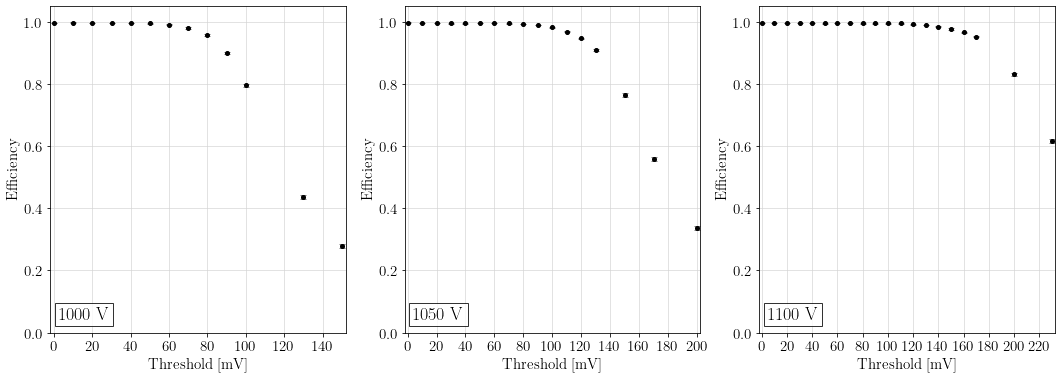

In [ ]:
# Create subplots grid (4 rows x 3 columns)
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 6), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()

# Loop over dataframes and axes
for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    ax = axes_flat[iPlot]

    ax.errorbar(
        df['Th [mV]'], df['epsilon_3'], 
        yerr = df['sigma_epsilon_3'],  # Error bar values
        fmt = 'o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    #plt.title('Efficiency vs Threshold Voltage', fontsize = FONT_DIM[1])
    ax.set_xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
    ax.set_ylabel('Efficiency', fontsize = FONT_DIM[1])

    ax.set_xticks(Asse_x[voltage])
    ax.tick_params(axis='x', labelsize=FONT_DIM[1])
    ax.tick_params(axis='y', labelsize=FONT_DIM[1])

    ax.set_xlim(-2, df['Th [mV]'].max() + 2)
    ax.set_ylim(0, 1.05)   
    
    ax.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)

    ax.text(0.20, 0.08,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize = FONT_DIM[2], 
            bbox = dict(facecolor = 'white', alpha = GRID_ALPHA, edgecolor = 'black'),
            transform = ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha = 'right',  # Allineamento orizzontale a destra
            va = 'top')    # Allineamento verticale in alto

# Disposizione finale e visualizzazione
#plt.tight_layout()

if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_3_efficienza_per_tensione" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

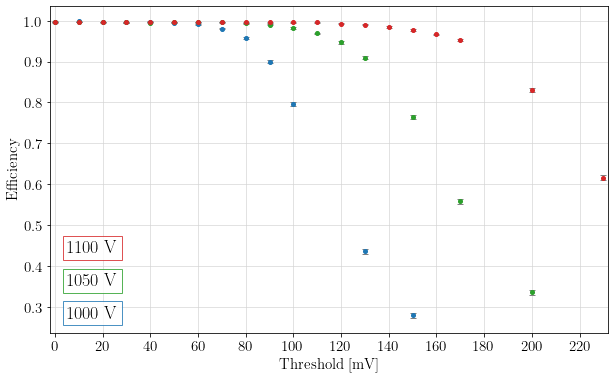

In [ ]:
# Create a single figure for the three curves
plt.figure(figsize = FIGSIZE_1_1)

for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    plt.errorbar(
        df['Th [mV]'], df['epsilon_3'], 
        yerr=df['sigma_epsilon_3'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color=COLORI_TRE[iPlot],  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    plt.text(-2.55, 0.06 + iPlot*0.1,  # Coordinate relative (x, y)
        f'{voltage} V', 
        fontsize=FONT_DIM[2], 
        bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[iPlot]),
        transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
        ha='right',  # Allineamento orizzontale a destra
        va='top')    # Allineamento verticale in alto
    
#plt.title('Efficiency vs Threshold Voltage', fontsize = FONT_DIM[1])
plt.xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
plt.ylabel('Efficiency', fontsize = FONT_DIM[1])

plt.xticks(Asse_x[1100], fontsize = FONT_DIM[1])
plt.yticks(fontsize = FONT_DIM[1])

plt.xlim(-2, df['Th [mV]'].max() + 2)

plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)

if ESPORTA_IMMGAGINI:
    plt.savefig(CARTELLA_IMMAGINI + "2_3_efficienza_completo" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()